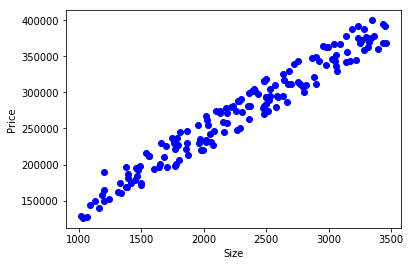

In [2]:
!pip install numpy
!pip install matplotlib

#
#   House_Price_Prediction.py
#
#    This is a very simple prediction of house prices based on house size, implemented 
#   in TensorFlow.  This code is part of Pluralsight's course "TensorFlow: Getting Started"
#

import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support

#  generation some house sizes between 1000 and 3500 (typical sq ft of house)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house )

# Generate house prices from house size with a random noise added.
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)  

# Plot generated house and size 
plt.plot(house_size, house_price, "bo")  # bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

iteration #:0002 cost= 1.326728225 size_factor= -0.161558 price_offset= -1.14493
iteration #:0004 cost= 0.895426214 size_factor= 0.0456974 price_offset= -0.937167
iteration #:0006 cost= 0.606481671 size_factor= 0.21534 price_offset= -0.767093
iteration #:0008 cost= 0.412913084 size_factor= 0.354196 price_offset= -0.627871
iteration #:0010 cost= 0.283243448 size_factor= 0.467853 price_offset= -0.513905
iteration #:0012 cost= 0.196383253 size_factor= 0.560883 price_offset= -0.420614
iteration #:0014 cost= 0.138202921 size_factor= 0.63703 price_offset= -0.344246
iteration #:0016 cost= 0.099235289 size_factor= 0.699358 price_offset= -0.281733
iteration #:0018 cost= 0.073138170 size_factor= 0.750375 price_offset= -0.230559
iteration #:0020 cost= 0.055662543 size_factor= 0.792133 price_offset= -0.188669
iteration #:0022 cost= 0.043961693 size_factor= 0.826313 price_offset= -0.154378
iteration #:0024 cost= 0.036128599 size_factor= 0.85429 price_offset= -0.126308
iteration #:0026 cost= 0.03088

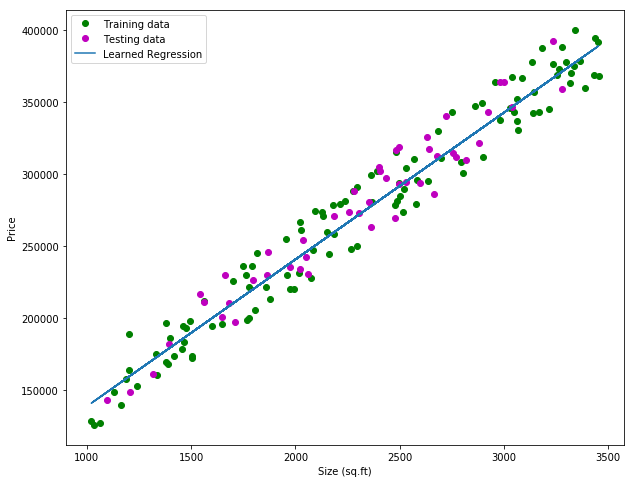

In [5]:
def normalize(array):
    return (array - array.mean()) / array.std()

# define number of training samples, 0.7 = 70%.  We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

# Setup the TF placeholders to get updated as we descend down the gradient
tf_house_size = tf.placeholder('float', name='house_size')
tf_price = tf.placeholder('float', name='price')

# Define the variables holding the size_factor and price we set during training
# We initialize them to some random values based on the normal distribution.
tf_size_factor = tf.Variable(np.random.randn(), name='size_factor')
tf_price_offset = tf.Variable(np.random.randn(), name='price_offset')

# 2. Define the operations for the predicting values - predicted price = (size_factor * house_size ) + price_offset
#  Notice, the use of the tensorflow add and multiply functions.  These add the operations to the computation graph,
#  AND the tensorflow methods understand how to deal with Tensors.  Therefore do not try to use numpy or other library 
#  methods.
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

# Calculate loss function (how much error) - mean sqaured error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)

# Optimizer learning rate.  The size of the steps down the gradient
learning_rate = 0.1

# Define gradient descent optmizer that will minimize the loss defined in the operation "cost"
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

# initialize the variables
init = tf.global_variables_initializer()

# launch the graph in the session
with tf.Session() as sess:
    sess.run(init)
    
    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50
    
    # Fit all the training data
    for iteration in range(num_training_iter):
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})
            
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
            print('iteration #:' '%04d' % (iteration + 1), 'cost=', '{:.9f}'.format(c), 'size_factor=', sess.run(tf_size_factor), 'price_offset=', sess.run(tf_price_offset))
        
    print('Optimization Finished')
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print('Trained cost=', training_cost, 'size_factor=', sess.run(tf_size_factor), 'price_offset=', sess.run(tf_price_offset), '\n')


    # Plot training data
    
    train_house_size_mean = train_house_size.mean()
    
    train_house_size_std = train_house_size.std()
    
    train_price_mean = train_price.mean()
    train_price_std = train_price.std()
    
    # Plot the graph
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.figure()
    plt.ylabel('Price')
    plt.xlabel('Size (sq.ft)')
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean, (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean, label='Learned Regression')

    plt.legend(loc='upper left')
    plt.show()